In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
model_timing = pd.read_csv('../data/model_timing_results.csv')
terminal_velocity = pd.read_csv('../data/terminal_velocity_results.csv')

In [11]:
(0.05484 - 0.13469) / 0.13469

-0.5928428242631227

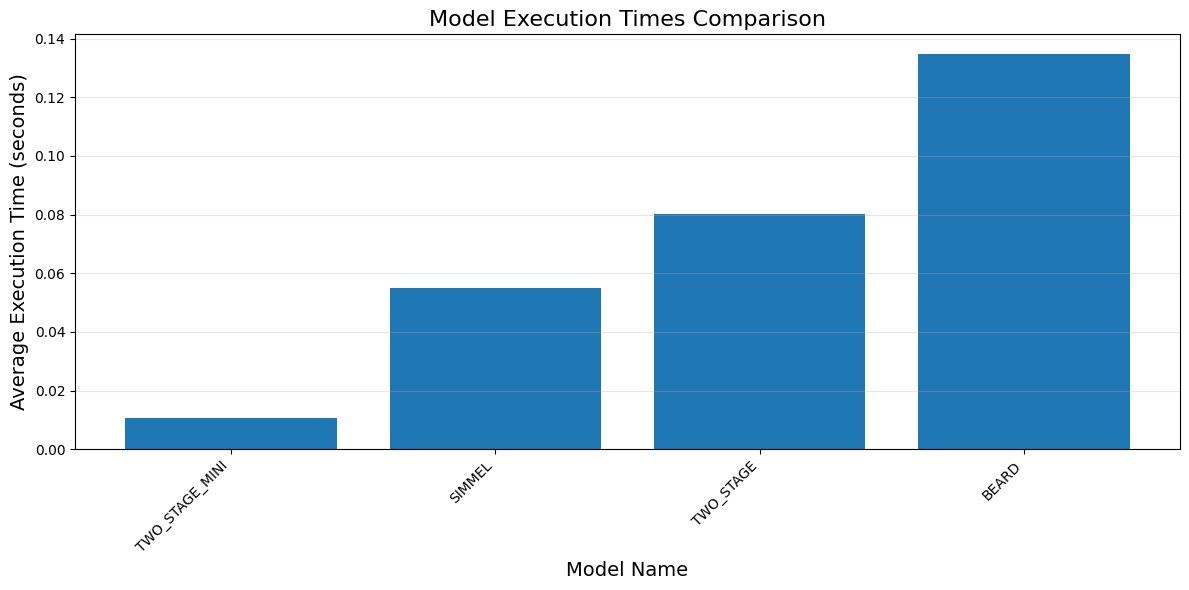

In [5]:
# Sort the data by execution time in ascending order
sorted_timing = model_timing.sort_values(by='AVERAGE_EXECUTION_TIME_SECONDS', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_timing['MODEL_NAME'], sorted_timing['AVERAGE_EXECUTION_TIME_SECONDS'])

plt.xlabel('Model Name', fontsize=14)
plt.ylabel('Average Execution Time (seconds)', fontsize=14)
plt.title('Model Execution Times Comparison', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig("../images/execution_times.png", bbox_inches='tight', dpi=3000)
plt.show()

In [6]:
base_columns = ['DIAMETER', 'TEMPERATURE', 'PRESSURE', 'ORIGINAL_VELOCITY']
model_columns = [col for col in terminal_velocity.columns if col not in base_columns]
data = []

for model in model_columns:
    abs_error = np.abs(terminal_velocity[model] - terminal_velocity['ORIGINAL_VELOCITY'])
    rel_error = abs_error / np.abs(terminal_velocity['ORIGINAL_VELOCITY'])
        
    mean_abs_error = np.mean(abs_error)
    max_abs_error = np.max(abs_error)
    mean_relative_error = np.mean(rel_error)
    max_relative_error = np.max(rel_error)
    time = model_timing[model_timing['MODEL_NAME'] == model]['AVERAGE_EXECUTION_TIME_SECONDS'].values[0]
    
    data.append({
        "model_name": model,
        "max_relative_error": max_relative_error * 100,
        "mean_relative_error": mean_relative_error * 100,
        "max_absolute_error": max_abs_error,
        "mean_absolute_error": mean_abs_error,
        "time": time
    })

# Save the data to the dataframe
comparison_results = data
model_metrics = pd.DataFrame(comparison_results)
display(model_metrics)

,model_name,max_relative_error,mean_relative_error,max_absolute_error,mean_absolute_error,time
0,BEARD,0.000209,0.000016,0.000021,0.000001,0.13469
1,SIMMEL,38.378040,7.826869,2.876380,0.164913,0.05484
2,TWO_STAGE,2.864735,0.577241,0.232317,0.013253,0.08016
3,TWO_STAGE_MINI,3.728209,0.690527,0.336630,0.017374,0.01079


In [7]:
temp = model_metrics.copy()
temp.columns = ['Metric', 'Max Relative Error', 'Mean Relative Error', 'Max Absolute Error', 'Mean Absolute Error', 'Time']
transposed_metrics = temp.set_index('Metric').T
def sci_notation_latex(x):
    if x == 0:
        return "$0$"
    base, exp = f"{x:.2e}".split("e")
    exp = int(exp)
    if exp == 0:
        return f"${base}$"
    else:
        return f"${base}\\times 10^{{{exp}}}$"

latex_table = transposed_metrics.to_latex(
    escape=False, 
    float_format=sci_notation_latex
)
print(latex_table)

\begin{tabular}{lrrrr}
\toprule
Metric & BEARD & SIMMEL & TWO_STAGE & TWO_STAGE_MINI \\
\midrule
Max Relative Error & $2.09\times 10^{-4}$ & $3.84\times 10^{1}$ & $2.86$ & $3.73$ \\
Mean Relative Error & $1.62\times 10^{-5}$ & $7.83$ & $5.77\times 10^{-1}$ & $6.91\times 10^{-1}$ \\
Max Absolute Error & $2.10\times 10^{-5}$ & $2.88$ & $2.32\times 10^{-1}$ & $3.37\times 10^{-1}$ \\
Mean Absolute Error & $1.11\times 10^{-6}$ & $1.65\times 10^{-1}$ & $1.33\times 10^{-2}$ & $1.74\times 10^{-2}$ \\
Time & $1.35\times 10^{-1}$ & $5.48\times 10^{-2}$ & $8.02\times 10^{-2}$ & $1.08\times 10^{-2}$ \\
\bottomrule
\end{tabular}



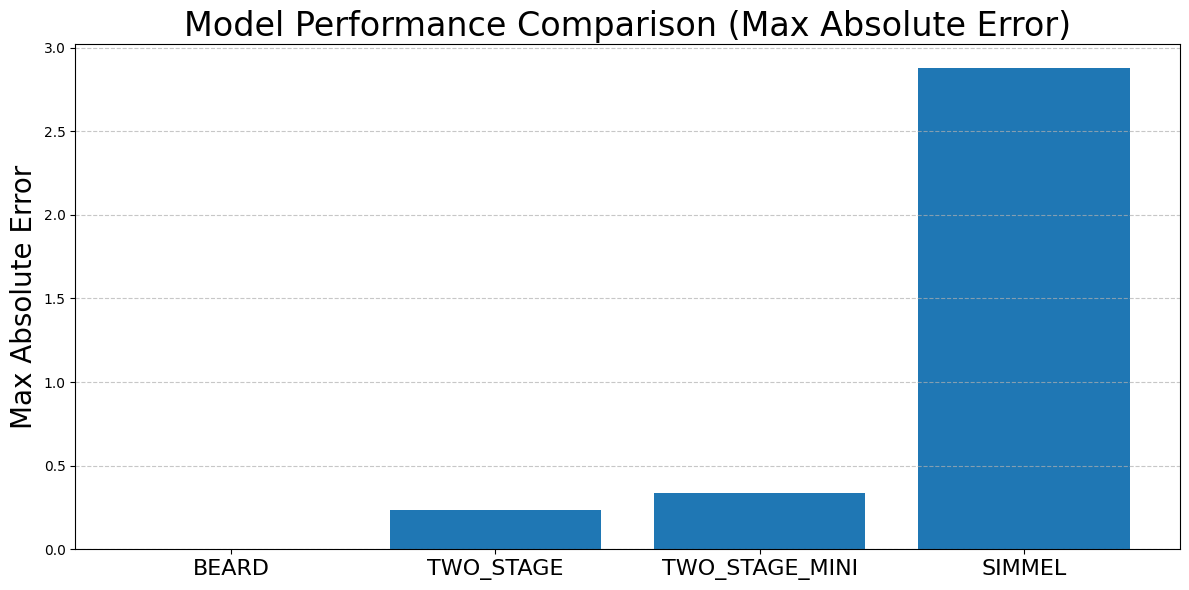

In [8]:
sorted_metrics = model_metrics.sort_values(by='max_absolute_error', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_metrics['model_name'], sorted_metrics['max_absolute_error'])

plt.xticks(rotation=0, ha='center', fontsize=16)
plt.ylabel('Max Absolute Error', fontsize=20)
plt.title('Model Performance Comparison (Max Absolute Error)', fontsize=24)
plt.tight_layout()

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.savefig("../images/max_absolute_errors.png", bbox_inches='tight', dpi=3000)
plt.show()

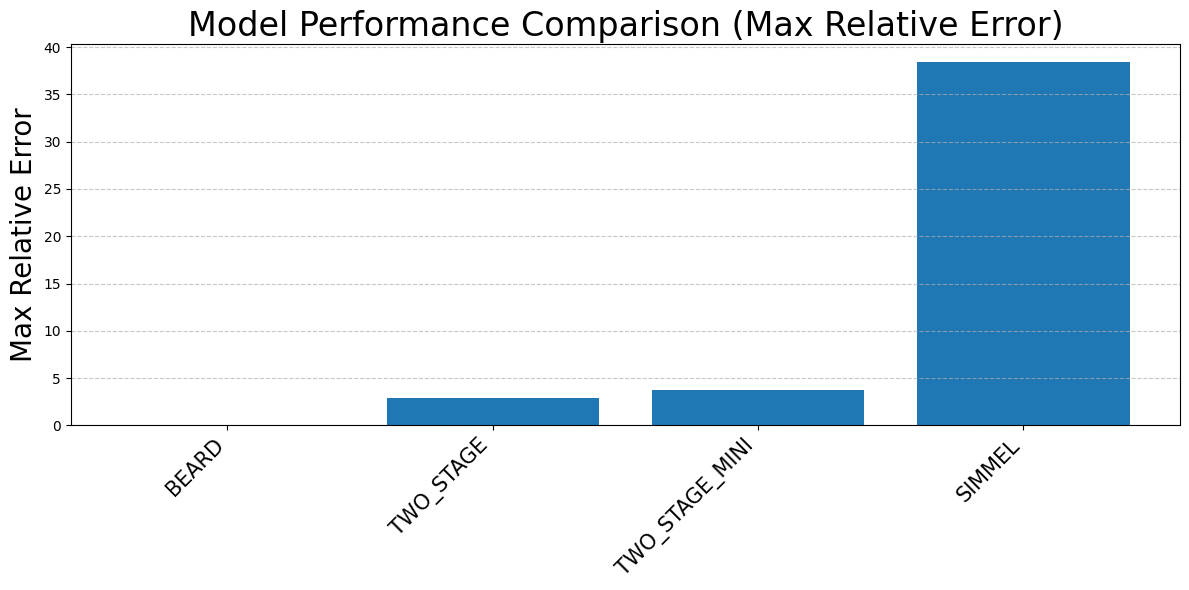

In [9]:
sorted_metrics = model_metrics.sort_values(by='max_relative_error', ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(sorted_metrics['model_name'], sorted_metrics['max_relative_error'])

plt.xticks(rotation=45, ha='right', fontsize=15)
plt.ylabel('Max Relative Error', fontsize=20)
plt.title('Model Performance Comparison (Max Relative Error)', fontsize=24)
plt.tight_layout()

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.savefig("../images/max_relative_errors.png", bbox_inches='tight', dpi=3000)
plt.show()